**Import Library**

In [1]:
import numpy as np
import pandas as pd

**Load Dataset**

In [2]:
retail=pd.read_csv("/content/retail_sales_dataset.csv")

**Data Preparation**

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
retail.shape

(1000, 9)

In [6]:
retail.duplicated().any()

False

In [7]:
retail.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [11]:
retail.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [12]:
retail['Date'] = pd.to_datetime(retail['Date'])
retail['Total Amount'] = pd.to_numeric(retail['Total Amount'].astype('float64'))
retail.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,float64


**EDA**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp

In [14]:
retail['Total Amount'].describe( )

,Total Amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


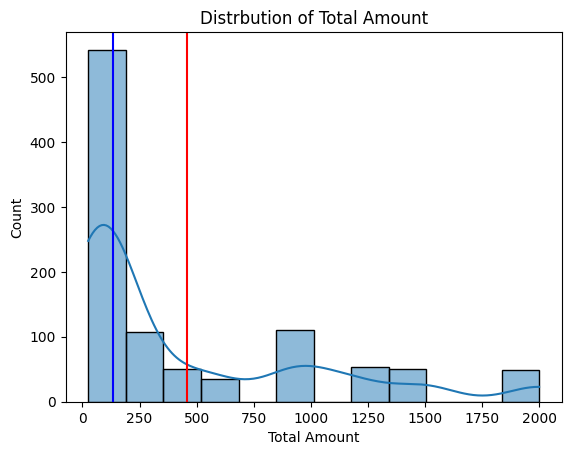

In [15]:
sns.histplot(data = retail, x = retail['Total Amount'], kde=True)
plt.title('Distrbution of Total Amount')
plt.axvline(retail['Total Amount'].mean(),color = "red")
plt.axvline(retail['Total Amount'].median(),color = "blue")

<Axes: xlabel='Total Amount'>

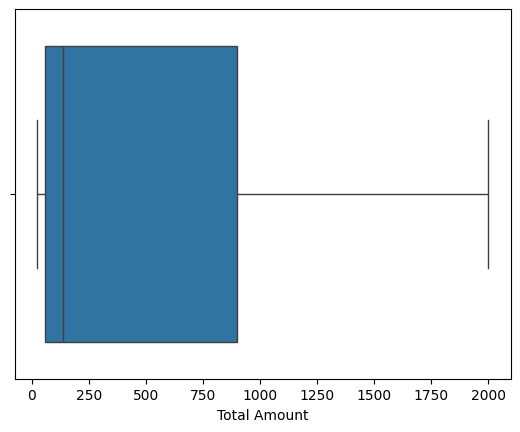

In [18]:
sns.boxplot(data = retail,x = retail['Total Amount'])

In [19]:
Pd_Category = retail['Product Category'].value_counts()
Pd_Category

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


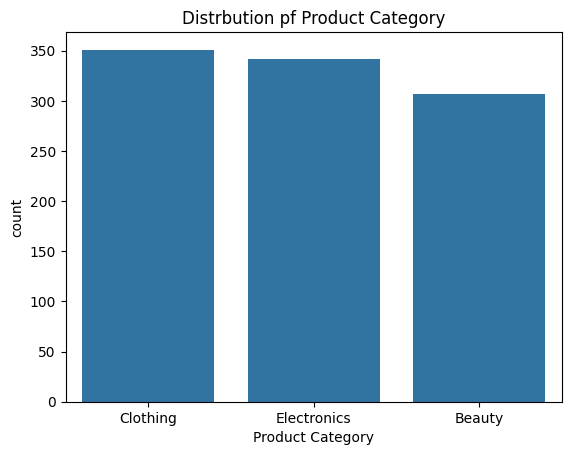

In [20]:
sns.barplot(x = Pd_Category.index, y = Pd_Category.values)
plt.ylabel('count')
plt.title('Distrbution pf Product Category')
plt.show()

**TIME SERISE ANALYSIS**

In [21]:
data_total = retail[['Total Amount','Date']]
data_total = data_total.set_index('Date')
data_total.sample(5)
data_total.groupby('Date')['Total Amount'].sum()
data_total.describe()

,Total Amount
count,1000.000000
mean,456.000000
std,559.997632
min,25.000000
25%,60.000000
50%,135.000000
75%,900.000000
max,2000.000000


<Axes: xlabel='Date'>

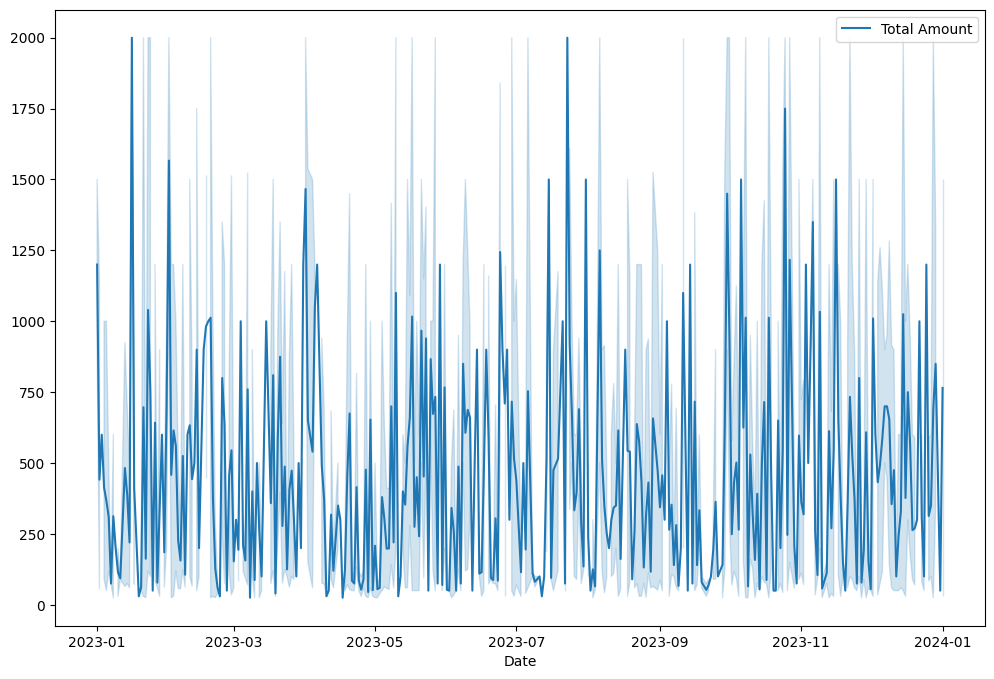

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(data = data_total)

In [23]:
cus_disc = {
    'ID' : retail['Customer ID'],
    'Total' : retail['Total Amount']
}
cus_disc = pd.DataFrame(cus_disc)

cus_disc = cus_disc.groupby('ID')['Total'].sum().reset_index()

cus_disc = cus_disc.sort_values(by = 'Total',ascending=False)

top_customers = cus_disc.head(10)
print(top_customers)

          ID   Total
487  CUST487  2000.0
476  CUST476  2000.0
773  CUST773  2000.0
503  CUST503  2000.0
92   CUST093  2000.0
88   CUST089  2000.0
946  CUST946  2000.0
157  CUST157  2000.0
155  CUST155  2000.0
420  CUST420  2000.0


<Axes: xlabel='ID', ylabel='Total'>

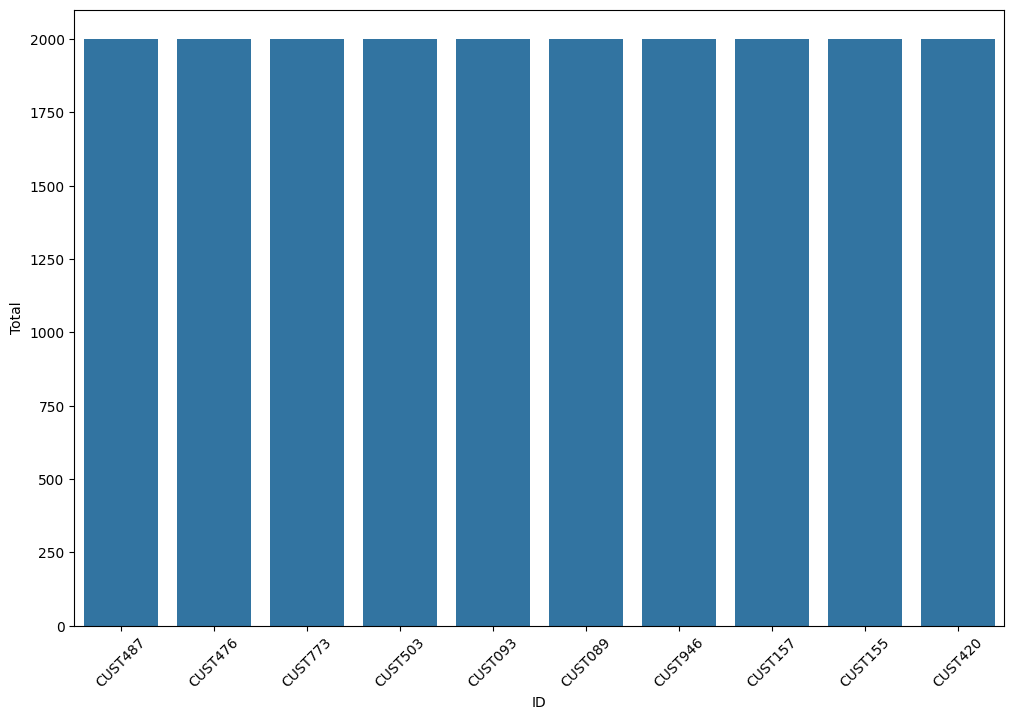

In [24]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(data = top_customers,x='ID',y='Total')

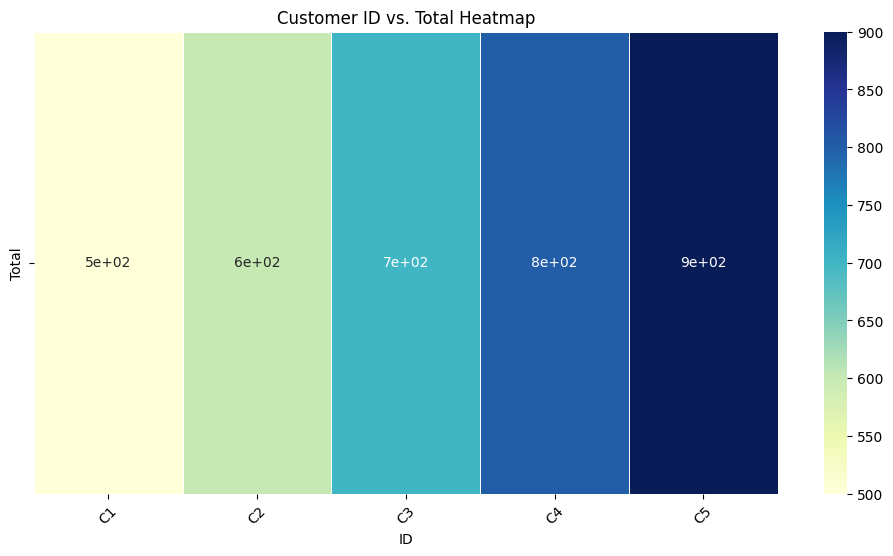

In [25]:
top_customers = pd.DataFrame({
    'ID': ['C1', 'C2', 'C3', 'C4', 'C5'],
    'Total': [500, 600, 700, 800, 900]
})

heatmap_data = top_customers.set_index('ID').T
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Customer ID vs. Total Heatmap')
plt.show()
